In [52]:
# Confusion Matrix Included is a function "con_mat" to calculate a range of scores and return as a dictionary
# ROC curve and AUC provided
# Input p


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.linear_model import LinearRegression, LogisticRegression



In [53]:
# An alternative to using "con_mat" is to use sklearn.metrics as those listed below

import sklearn.datasets as datasets
import pandas as pd
import numpy as np

from sklearn.metrics import auc
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_recall_curve as pc_curve
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import confusion_matrix as cm

In [108]:
# The function calculates confusion matrix values (TP, FP, FN, TN), recall, precision, specificity, fall out and f1 score
# Input are the predictions and actuals as arrays of 0 and 1s 
# Returns a dictionary of all the values


def con_mat(predictions, actuals): # predictions = predicted Y, actuals = actual y
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    # print('In con_mat')
    # print(predictions[1], actuals[1])
    
    for i in range(0, len(predictions)):
        if ( predictions[i] == 1 and actuals[i] == 1 ) :
            TP += 1
        elif ( predictions[i] == 0 and actuals[i] == 0 ) :
            TN += 1
        elif ( predictions[i] == 1 and actuals[i] == 0 ) :
            FP += 1
        elif ( predictions[i] == 0 and actuals[i] == 1 ) :
            FN += 1
            
    # Accuracy calculates the % of times the model made a correct prediction 
    # Precision calculates the % of times it correctly predicted the true for all the times value is true
    # Recall calculates the % of times it correctly predicted true for all the times it predicted true
    # Specificity calculates the % of times the model accurated predicted true negative for call the times it was negative
    
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    fall_out = FP / (FP + TN)
    f_score = 2 * (precision * recall) / (precision + recall)
    
    con_results = {"TP" :TP, "TN" : TN, "FP" : FP, "FN" : FN, "Accuracy" : accuracy, "Recall" : recall,
                  "Precision" : precision, "Specificity" : specificity, "Fall Out" : fall_out,
                  "F_Score" : f_score}
    
    return con_results

def calculate_at_threshold(threshold, predictions, actuals): 
    
    # threshold = probability threshold, predictions = prediction probability, actuals = actual y
    # print('In calculate at threshold')
    # print(threshold, predictions[1], actuals[1])
    x_coord = 0
    y_coord = 0
    y_n = []
    
    for i in range(0, len(predictions)):
        if predictions[i] >= threshold:
            y_n.append(1)
        else:
            y_n.append(0)
            
    results = con_mat(y_n, actuals)
    
    x_coord = results.get("Fall Out")
    y_coord = results.get("Recall")
            
    # return x_coord, y_coord, y_n, results
    return results

In [111]:
# calculate results at a selected threshold with pred probability and actuals

results = calculate_at_threshold(.5, predicted[0], actuals[0])
results


{'TP': 38,
 'TN': 30,
 'FP': 19,
 'FN': 13,
 'Accuracy': 0.68,
 'Recall': 0.7450980392156863,
 'Precision': 0.6666666666666666,
 'Specificity': 0.6122448979591837,
 'Fall Out': 0.3877551020408163,
 'F_Score': 0.7037037037037038}

In [105]:
def ROC_curve(predictions, actuals):

   
    fpr, tpr, thresholds = roc(actuals,predictions)
    roc_auc = auc(fpr,tpr)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr,
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    

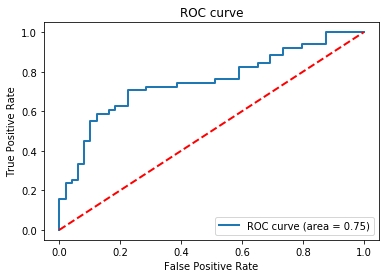

In [106]:
# Display ROC curve and calculate AUC

ROC_curve(predicted[0], actuals[0])    # Create the graph with predicted prob of y "predicted" and actual y "actuals"



In [101]:
# Calculate performance metrics and return a dictionary of keys value pairs
results = con_mat(data[0], actuals[0])
print(results)

{'TP': 37, 'TN': 31, 'FP': 18, 'FN': 14, 'Accuracy': 0.68, 'Recall': 0.7254901960784313, 'Precision': 0.6727272727272727, 'Specificity': 0.6326530612244898, 'Fall Out': 0.3673469387755102, 'F_Score': 0.6981132075471698}


In [102]:
# Utilize the sklearn functions to calculate recall, precision, f1 score and confusion matrix
def con_mat2(actuals, predicted):
    print("Recall: "+str(recall(actuals,predicted)))
    print("Precision: "+str(precision(actuals,predicted)))
    print("F1 score: "+str(f1(actuals,predicted)))
    print("Confusion matrix: \n"+str(cm(actuals,predicted)))
    return

In [107]:
con_mat2(actuals[0], data[0])

Recall: 0.7254901960784313
Precision: 0.6727272727272727
F1 score: 0.6981132075471698
Confusion matrix: 
[[31 18]
 [14 37]]


In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc

from sklearn.linear_model import LinearRegression, LogisticRegression


dat1 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=8)
dat2 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=9)
dat3 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=6)

# The continuous predictions from the linear regression
lin_regr = LinearRegression(normalize=True)
lin_regr.fit(dat1[0], dat1[1])
output1 = lin_regr.predict(dat1[0])
lin_regr.fit(dat2[0], dat2[1])
output2 = lin_regr.predict(dat2[0])
lin_regr.fit(dat2[0], dat2[1])
output3 = lin_regr.predict(dat3[0])

actuals = [dat1[1],dat2[1],dat3[1]]
predicted = [output1,output2,output3]

# The discrete predictions from the logistic regression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(dat1[0],dat1[1])
outputD1 = log_reg.predict(dat1[0])
log_reg.fit(dat2[0],dat2[1])
outputD2 = log_reg.predict(dat2[0])
log_reg.fit(dat3[0],dat3[1])
outputD3 = log_reg.predict(dat3[0])
data = [outputD1,outputD2,outputD3]